## Using pandas.read_sql_query() to return information on the tables in database

In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## Writing query that returns first 5 rows of the only table in the database

In [6]:
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Writing query that returns min, max population and min, max population_growth

In [7]:
query = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(query,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## Query returning country and area where population is 0

In [10]:
query = "SELECT name, area FROM facts WHERE population = 0;"
pd.read_sql_query(query,conn)

,name,area
0,Antarctica,None


## Query where population is 7256490011

In [9]:
query = "SELECT name, area FROM facts WHERE population=7256490011;"
pd.read_sql_query(query,conn)

,name,area
0,World,None


## Creating histograms of population, population growth, death rate and birth rate for all rows excluding World and Antarctica

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55e36ae10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd55e222780>]], dtype=object)

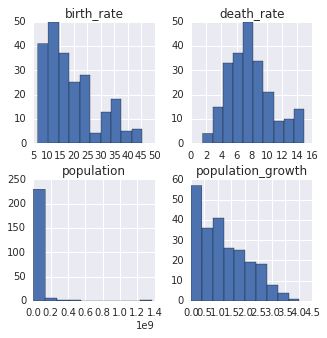

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

query = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != 0 and population != (select MAX(population) from facts);"
pd.read_sql_query(query,conn).hist(ax=ax)